# 第 4 章第 2 节-使用 $k$ 近邻算法进行回归拟合

+ $k$ 近邻算法在连续区间内对数值进行预测，方法是选取待预测点 $k$ 个最近的邻居，用它们的平均值作为待预测点的回归结果。

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 生成训练样本
n_dots = 40
X = 5 * np.random.rand(n_dots, 1)

拉平

In [4]:
y = np.cos(X).ravel()
y

array([ 0.99998726,  0.79338093, -0.96377617,  0.99484756,  0.53552147,
       -0.99818455,  0.09882631,  0.81744483,  0.95217303, -0.56524663,
       -0.53927986, -0.01986496, -0.51578976, -0.99991806,  0.17939602,
       -0.60783785, -0.69768102, -0.9973311 ,  0.24122001, -0.97471368,
        0.53895166, -0.76009517,  0.85992591,  0.46784017,  0.98018821,
       -0.99978108, -0.86836865,  0.08903491,  0.33691038,  0.29207961,
       -0.06309587,  0.2658592 ,  0.11473463, -0.90904641, -0.82642599,
       -0.80540121,  0.3968797 , -0.96421672, -0.94771792,  0.10677317])

In [5]:
# 添加一些噪声
y += 0.2 * np.random.rand(n_dots) - 0.1

In [6]:
# 训练模型
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn = KNeighborsRegressor(k)
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

+ [:, np.newaxis] 行向量变成列向量了

In [7]:
np.linspace(0, 5, 500).shape

(500,)

In [8]:
np.linspace(0, 5, 500)[:, np.newaxis].shape

(500, 1)

In [9]:
# 生成足够密集的点并进行预测
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)
knn.score(X, y)

0.9897784772726681

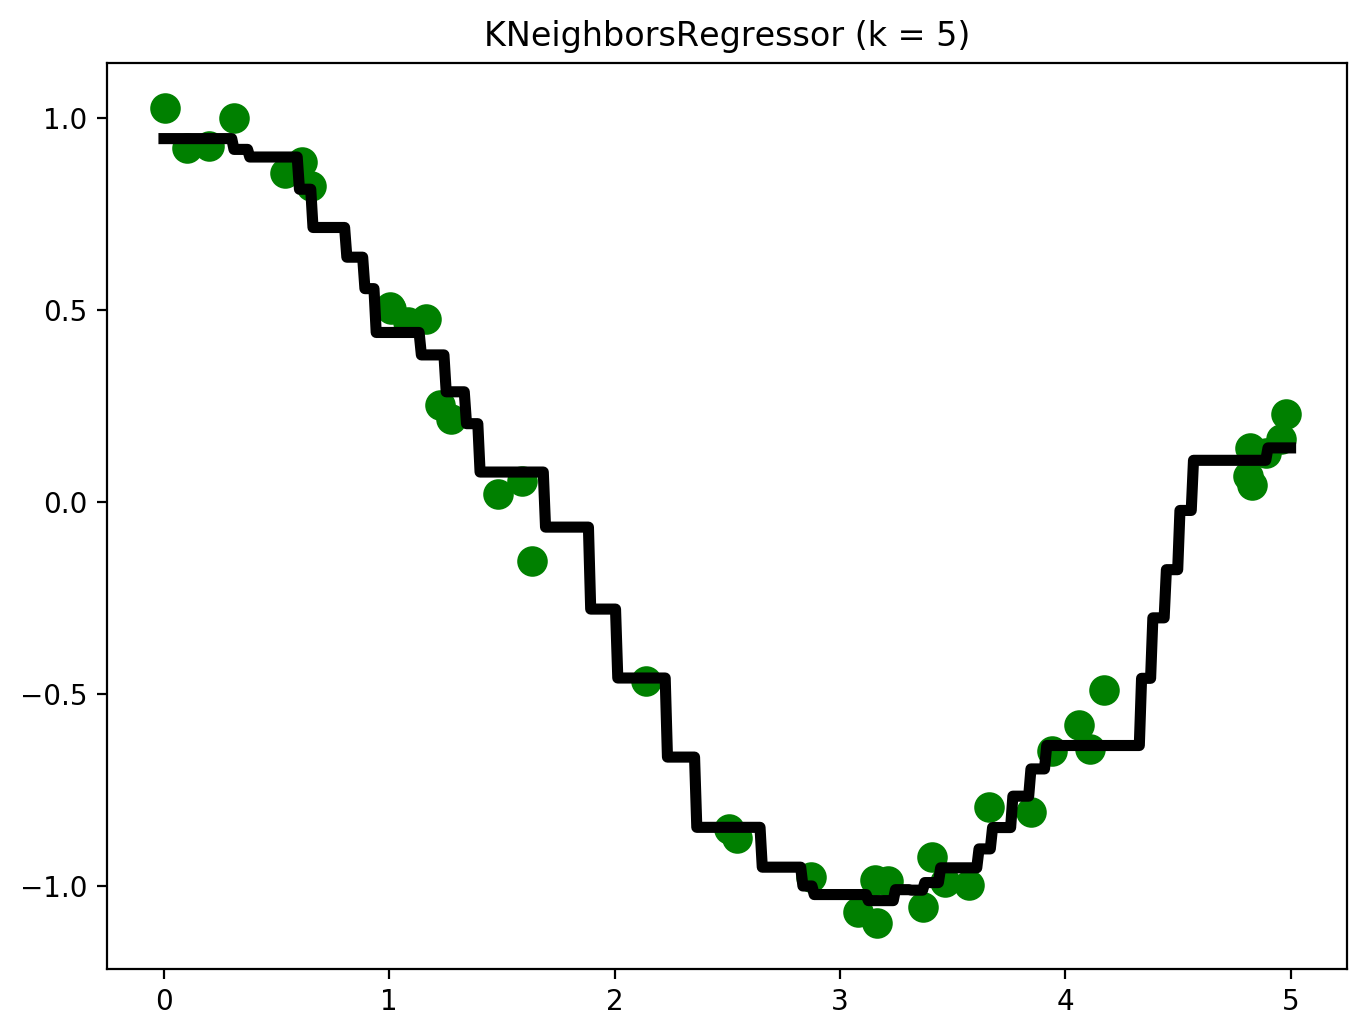

In [11]:
# 画出拟合曲线
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(X, y, c='g', label='data', s=100)         # 画出训练样本
plt.plot(T, y_pred, c='k', label='prediction', lw=4)  # 画出拟合曲线
# 修改 x、y 坐标的范围让所有的数据显示出来
plt.axis('tight')
plt.title("KNeighborsRegressor (k = %i)" % k)
plt.show()